<a href="https://colab.research.google.com/github/Nahom32/DNN-Simulation/blob/main/DNN_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Neural Networks
This notebook contains an illustration of how the deep neural networks work. It implements how both forward and backward propagation works using the gradient descent algorithm.

The forward propagation algorithm works as follows:
$$Z^l = W^la^{l-1} + b^l$$
$$a^l = \alpha(Z^l)$$ where $\alpha$ is the activation function
The backward propagation algorithms uses gradient descent to autocorrect the weights. The algorihtm works as follows:
$$W^l = W^l - \frac{∂E}{∂W^l}$$

Since the Error equation isn't described interms of the internal weights, we need to use the chain rule to find the partial derivative.





## Imports


In [1]:
import numpy as np
import pandas as pd


In [2]:
def relu(x):
  '''
  Description
  ---------------------------
  This is the relu activation function which is mostly used in hidden layers
  ===========================
  args:
    x: flloat, np.matrix
  returns:
    np.matrix
  '''
  return np.maximum(x,0)

def softmax(x):
    x_val = np.exp(x - np.max(x, axis=1, keepdims=True))
    return x_val / np.sum(x_val, axis=1, keepdims=True)

def sigmoid(x):
  '''
  Description
  ---------------------------
  This is the sigmoid activation function
  ===========================
  args:
    x: flloat, np.matrix
  returns:
    np.matrix
  '''
  return 1/(1+np.exp(-x))




In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

The MNIST (The modified National Institute of Standards and Technology) is a dataset used for benchmarking purposes in image classification tasks. It contains datasets that contain handwritten digits from 0 to 9.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


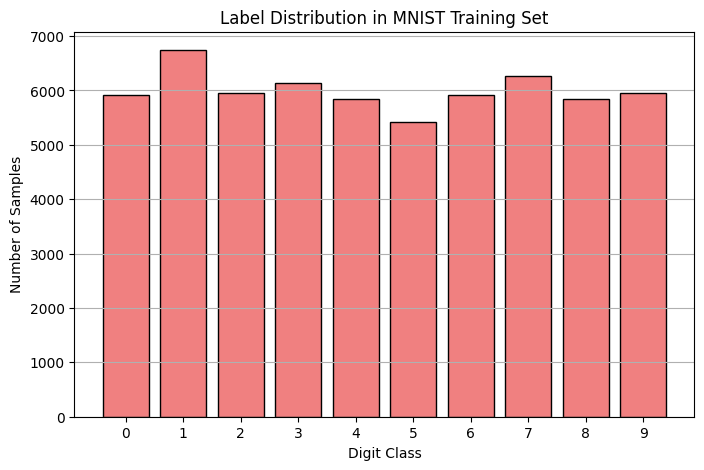

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color="lightcoral", edgecolor="black")
plt.title("Label Distribution in MNIST Training Set")
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.xticks(unique)
plt.grid(axis='y')
plt.show()

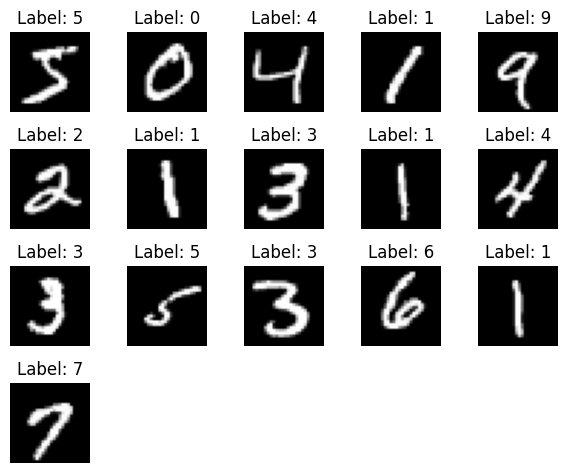

In [6]:
num_samples = 16
plt.figure(figsize=(6, 6))

for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Activation Function Benchmarking
The following will implement a DNN with a variaty of activation functions used in Deep Neural Networks. This includes the **Leaky ReLU**, **ReLU**, **Sigmoid** and **Swish**


In [7]:
def dnn(activation,optimizer_fn):
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(256,activation=activation),
      Dense(128, activation=activation),
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer=optimizer_fn,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

Activation Function: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8958 - loss: 0.3631 - val_accuracy: 0.9661 - val_loss: 0.1072
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9733 - loss: 0.0871 - val_accuracy: 0.9735 - val_loss: 0.0784
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9793 - loss: 0.0619 - val_accuracy: 0.9775 - val_loss: 0.0740
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9752 - val_loss: 0.0778
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9893 - loss: 0.0321 - val_accuracy: 0.9797 - val_loss: 0.0729
Activation Function: sigmoid
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8136 - loss: 0.6984 - val_accuracy: 0.9439 - val_loss: 0.1862
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9490 - loss: 0.1723 - val_accuracy: 0.9571 - val_loss: 0.1376
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accur

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

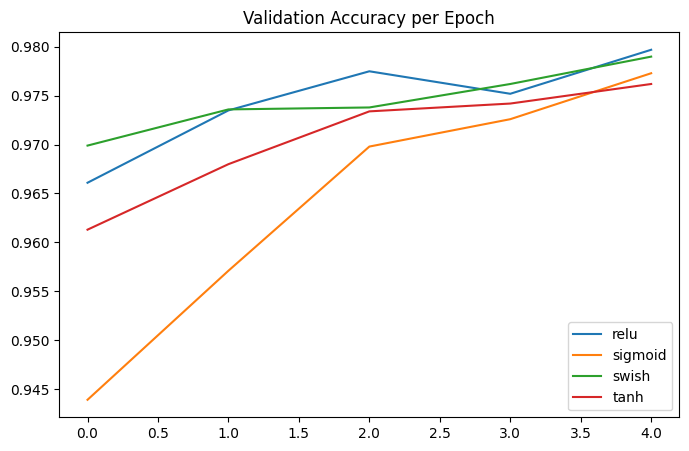

In [8]:
activation_functions = {'relu','sigmoid','swish','tanh'}
optimizer_functions = {'adam','sgd','rmsprop'}
results = {}
model_results = {}
for activation in activation_functions:
  print(f'Activation Function: {activation}')
  model = dnn(activation,'adam')
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[activation] = history
  results[activation] = history.history['val_accuracy']
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')







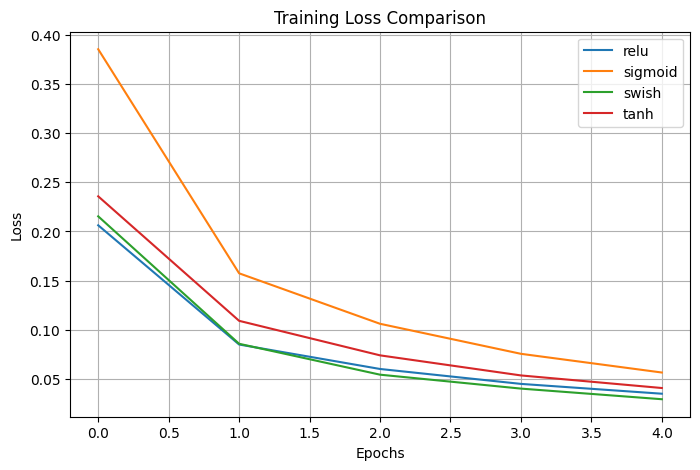

In [10]:
plt.figure(figsize=(8, 5))
for name, history in model_results.items():
    plt.plot(history.history['loss'], label=name)

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from tensorflow.keras.layers import LeakyReLU, PReLU
def reluDNN(activation: str):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  activation = activation.lower()
  if activation == 'prelu':
    model.add(Dense(256))
    model.add(PReLU())
    model.add(Dense(128))
    model.add(PReLU())
  elif activation == 'leakyrelu':
    model.add(Dense(256))
    model.add(LeakyReLU(alpha= 0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha = 0.01))
  else:
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8959 - loss: 0.3574 - val_accuracy: 0.9662 - val_loss: 0.1084
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9735 - loss: 0.0878 - val_accuracy: 0.9748 - val_loss: 0.0809
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9733 - val_loss: 0.0840
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9787 - val_loss: 0.0804
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8904 - loss: 0.3639 - val_accuracy: 0.9702 - val_loss: 0.0956
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9714 - loss: 0.0893 - val_accuracy: 0.9738 - val_loss: 0.0839
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9806 - loss: 0.0591 - 

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

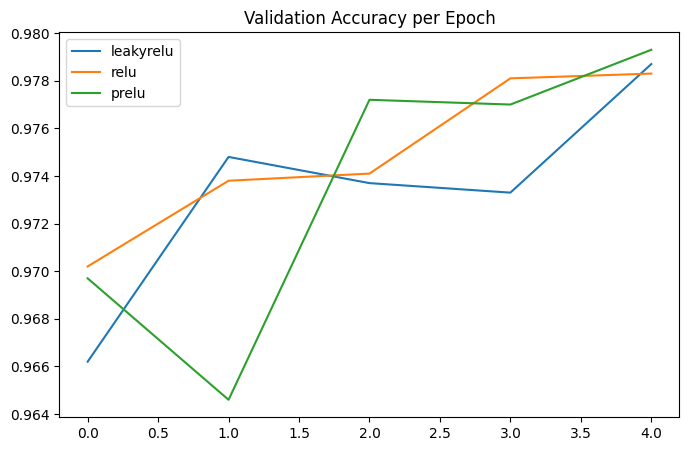

In [12]:
relu_variants = {'relu','leakyrelu','prelu'}
model_results = {}
results = {}
for variant in relu_variants:
  model = reluDNN(variant)
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[variant] = history.history['val_accuracy']
  results[variant] = history
plt.figure(figsize=(8, 5))
for name, history in model_results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')



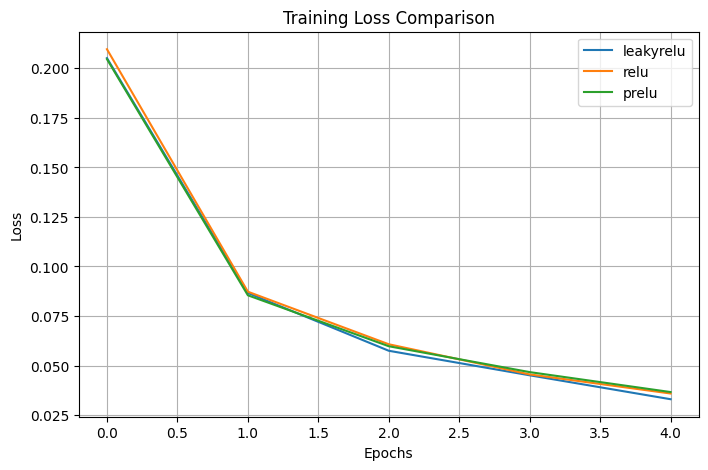

In [13]:
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history.history['loss'], label=name)

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
def n_deep_neural_network(depth,optimize_algorithm):
  model = Sequential([Flatten(input_shape=(28,28))])
  for i in range(depth):
    model.add(Dense(256,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer= optimize_algorithm,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


Training model with depth 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8916 - loss: 0.3725 - val_accuracy: 0.9653 - val_loss: 0.1158
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9721 - loss: 0.0959 - val_accuracy: 0.9741 - val_loss: 0.0862
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9825 - loss: 0.0584 - val_accuracy: 0.9756 - val_loss: 0.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.0421 - val_accuracy: 0.9783 - val_loss: 0.0729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.9769 - val_loss: 0.0740
Training model with depth 2
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8967 - loss: 0.3470 - val_accuracy: 0.9623 - val_loss: 0.1161
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9727 - loss: 0.0869 - val_accuracy: 0.9778 - val_loss: 0.0751
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accura

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

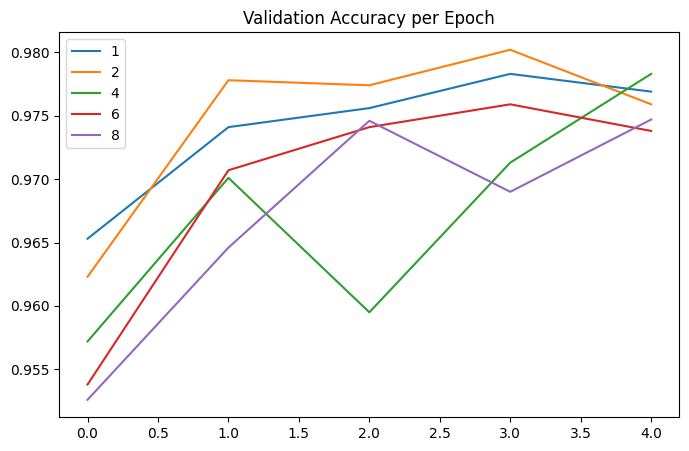

In [15]:
depth = {1,2,4,6,8}
model_results ={}
results = {}
for d in depth:
  print(f"Training model with depth {d}")
  model = n_deep_neural_network(d,'adam')
  history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))
  model_results[d] = history.history['val_accuracy']
  results[d] = history
plt.figure(figsize=(8, 5))
for name, history in model_results.items():
    plt.plot(history, label=name)
plt.legend()
plt.title('Validation Accuracy per Epoch')


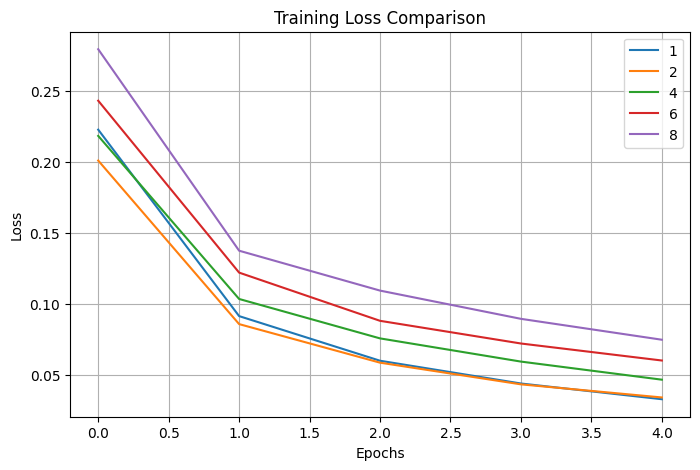

In [16]:
plt.figure(figsize=(8, 5))
for name, history in results.items():
    plt.plot(history.history['loss'], label=name)

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()